<a href="https://colab.research.google.com/github/TanLBT/AI_sangthu2/blob/main/20146527_btweek5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fc2654a8dd50b7758332181bd1c6f4db9d5b3fed0d1313c71bf96243b2526dfa
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

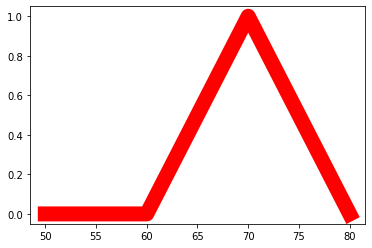

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)
slow=fuzz.trimf(x,[60,70,80])
plt.figure()
plt.plot(x,slow,'r',linewidth = 15, label = 'slow')
plt.plot

21.55555555555555


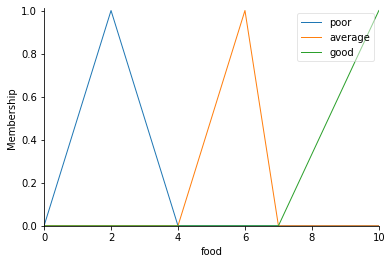

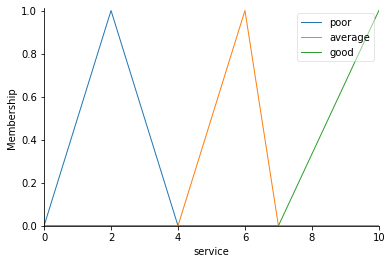

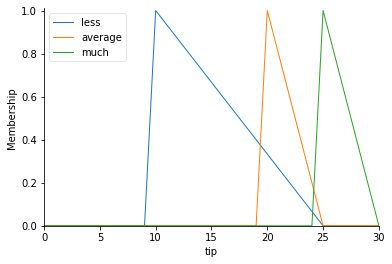

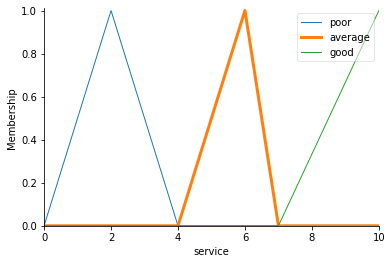

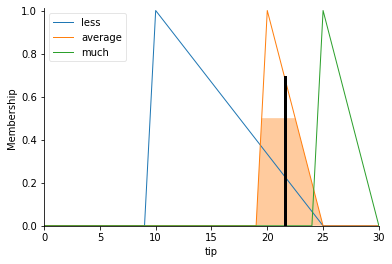

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(0,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,2,4])
food['average']=fuzz.trimf(food.universe,[4,6,7])
food['good']=fuzz.trimf(food.universe,[7,10,10])
food.view()

service['poor']=fuzz.trimf(service.universe,[0,2,4])
service['average']=fuzz.trimf(service.universe,[4,6,7])
service['good']=fuzz.trimf(service.universe,[7,10,10])
service.view()

tip['less']=fuzz.trimf(tip.universe,[10,10,25])
tip['average']=fuzz.trimf(tip.universe,[20,20,25])
tip['much']=fuzz.trimf(tip.universe,[25,25,30])
tip.view()

service['average'].view()
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['average'])
rule5=ctrl.Rule(food['average']&service['average'],tip['average'])
rule6=ctrl.Rule(food['average']&service['good'],tip['average'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['average'],tip['average'])
rule9=ctrl.Rule(food['good']&service['good'],tip['average'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

56.666666666666615


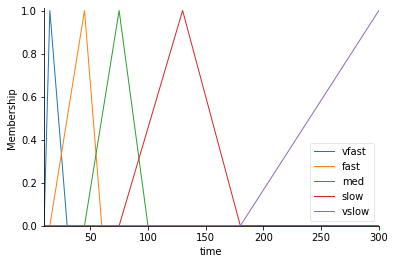

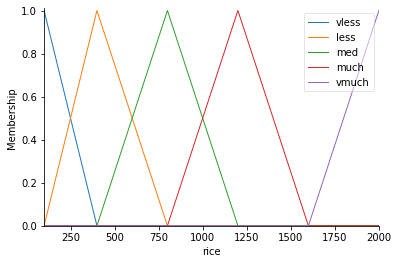

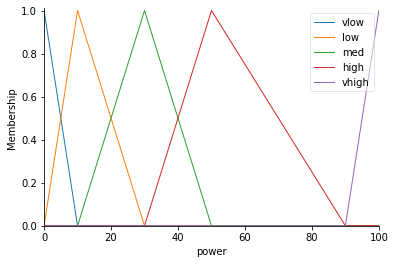

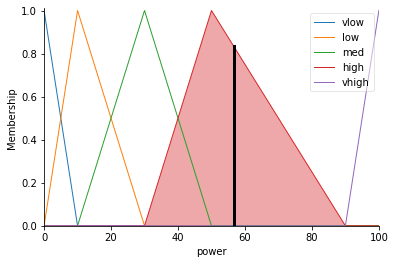

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
time=ctrl.Antecedent(np.arange(10,301,1),'time')
rice=ctrl.Antecedent(np.arange(100,2001,1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')

#Hàm liên thuộc
time['vfast']=fuzz.trimf(time.universe,[10,15,30])
time['fast']=fuzz.trimf(time.universe,[15,45,60])
time['med']=fuzz.trimf(time.universe,[45,75,100])
time['slow']=fuzz.trimf(time.universe,[75,130,180])
time['vslow']=fuzz.trimf(time.universe,[180,300,300])
time.view()

rice['vless']=fuzz.trimf(rice.universe,[100,100,400])
rice['less']=fuzz.trimf(rice.universe,[100,400,800])
rice['med']=fuzz.trimf(rice.universe,[400,800,1200])
rice['much']=fuzz.trimf(rice.universe,[800,1200,1600])
rice['vmuch']=fuzz.trimf(rice.universe,[1600,2000,2000])
rice.view()

power['vlow']=fuzz.trimf(power.universe,[0,0,10])
power['low']=fuzz.trimf(power.universe,[0,10,30])
power['med']=fuzz.trimf(power.universe,[10,30,50])
power['high']=fuzz.trimf(power.universe,[30,50,90])
power['vhigh']=fuzz.trimf(power.universe,[90,100,100])
power.view()

rule1=ctrl.Rule(time['vfast']&rice['vless'],power['vlow'])
rule2=ctrl.Rule(time['vfast']&rice['less'],power['low'])
rule3=ctrl.Rule(time['vfast']&rice['med'],power['med'])
rule4=ctrl.Rule(time['vfast']&rice['much'],power['high'])
rule5=ctrl.Rule(time['vfast']&rice['vmuch'],power['vhigh'])
rule6=ctrl.Rule(time['fast']&rice['vless'],power['vlow'])
rule7=ctrl.Rule(time['fast']&rice['less'],power['low'])
rule8=ctrl.Rule(time['fast']&rice['med'],power['med'])
rule9=ctrl.Rule(time['fast']&rice['much'],power['high'])
rule10=ctrl.Rule(time['fast']&rice['vmuch'],power['vhigh'])
rule11=ctrl.Rule(time['med']&rice['vless'],power['low'])
rule12=ctrl.Rule(time['med']&rice['less'],power['low'])
rule13=ctrl.Rule(time['med']&rice['med'],power['med'])
rule14=ctrl.Rule(time['med']&rice['much'],power['high'])
rule15=ctrl.Rule(time['med']&rice['vmuch'],power['vhigh'])
rule16=ctrl.Rule(time['slow']&rice['vless'],power['low'])
rule17=ctrl.Rule(time['slow']&rice['less'],power['low'])
rule18=ctrl.Rule(time['slow']&rice['med'],power['med'])
rule19=ctrl.Rule(time['slow']&rice['much'],power['high'])
rule20=ctrl.Rule(time['slow']&rice['vmuch'],power['high'])
rule21=ctrl.Rule(time['vslow']&rice['vless'],power['vlow'])
rule22=ctrl.Rule(time['vslow']&rice['less'],power['low'])
rule23=ctrl.Rule(time['vslow']&rice['med'],power['med'])
rule24=ctrl.Rule(time['vslow']&rice['much'],power['high'])
rule25=ctrl.Rule(time['vslow']&rice['vmuch'],power['high'])
congsuat_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
congsuat = ctrl.ControlSystemSimulation(congsuat_ctrl)
congsuat.input['time']=300
congsuat.input['rice']=2000
congsuat.compute()
print(congsuat.output['power'])
power.view(sim=congsuat)
